In [34]:
import pandas
import sklearn
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import collections
from tabulate import tabulate
from sklearn.decomposition import PCA

In [2]:
df = pandas.read_csv("menu.csv")
print(df)

               Category                                               Item  \
0             Breakfast                                       Egg McMuffin   
1             Breakfast                                  Egg White Delight   
2             Breakfast                                   Sausage McMuffin   
3             Breakfast                          Sausage McMuffin with Egg   
4             Breakfast                   Sausage McMuffin with Egg Whites   
..                  ...                                                ...   
255  Smoothies & Shakes                 McFlurry with Oreo Cookies (Small)   
256  Smoothies & Shakes                McFlurry with Oreo Cookies (Medium)   
257  Smoothies & Shakes                 McFlurry with Oreo Cookies (Snack)   
258  Smoothies & Shakes  McFlurry with Reese's Peanut Butter Cups (Medium)   
259  Smoothies & Shakes   McFlurry with Reese's Peanut Butter Cups (Snack)   

        Serving Size  Calories  Calories from Fat  Total Fat  \

In [3]:
labels = []
for c in df['Category']:
    labels.append(c)

In [4]:
print( labels)

['Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Beef & Pork', 'Beef & Pork', 'Beef & Pork', 'Beef & Pork', 'Beef & Pork', 'Beef & Pork', 'Beef & Pork', 'Beef & Pork', 'Beef & Pork', 'Beef & Pork', 'Beef & Pork', 'Beef & Pork', 'Beef & Pork', 'Beef & Pork', 'Beef & Pork', 'Chicken & Fish', 'Chicken & Fish', 'Chicken & Fish', 'Chicken & Fish', 'Chicken & Fish', 'Chicken & Fish', 'Chicken & Fish', 'Chicken & Fish', 'Chicken & Fish', 'Chicken & Fish', 'Chicken & Fish', 'Chicken & Fish', 'Chicken & F

Delete category and item columns

In [5]:
df.pop("Category")
df.pop("Item")
df.pop("Serving Size")

0       4.8 oz (136 g)
1       4.8 oz (135 g)
2       3.9 oz (111 g)
3       5.7 oz (161 g)
4       5.7 oz (161 g)
            ...       
255    10.1 oz (285 g)
256    13.4 oz (381 g)
257     6.7 oz (190 g)
258    14.2 oz (403 g)
259     7.1 oz (202 g)
Name: Serving Size, Length: 260, dtype: object

In [6]:
print(df)

     Calories  Calories from Fat  Total Fat  Total Fat (% Daily Value)  \
0         300                120       13.0                         20   
1         250                 70        8.0                         12   
2         370                200       23.0                         35   
3         450                250       28.0                         43   
4         400                210       23.0                         35   
..        ...                ...        ...                        ...   
255       510                150       17.0                         26   
256       690                200       23.0                         35   
257       340                100       11.0                         17   
258       810                290       32.0                         50   
259       410                150       16.0                         25   

     Saturated Fat  Saturated Fat (% Daily Value)  Trans Fat  Cholesterol  \
0              5.0                

In [7]:
df_normalized = ((df-df.min())/(df.max()-df.min()))*10

In [8]:
print(df_normalized)

     Calories  Calories from Fat  Total Fat  Total Fat (% Daily Value)  \
0    1.595745           1.132075   1.101695                   1.098901   
1    1.329787           0.660377   0.677966                   0.659341   
2    1.968085           1.886792   1.949153                   1.923077   
3    2.393617           2.358491   2.372881                   2.362637   
4    2.127660           1.981132   1.949153                   1.923077   
..        ...                ...        ...                        ...   
255  2.712766           1.415094   1.440678                   1.428571   
256  3.670213           1.886792   1.949153                   1.923077   
257  1.808511           0.943396   0.932203                   0.934066   
258  4.308511           2.735849   2.711864                   2.747253   
259  2.180851           1.415094   1.355932                   1.373626   

     Saturated Fat  Saturated Fat (% Daily Value)  Trans Fat  Cholesterol  \
0              2.5                

K-Means Clustering

In [9]:
X = df_normalized.values

In [10]:
print(X)

[[1.59574468 1.13207547 1.10169492 ... 0.         3.57142857 3.75      ]
 [1.32978723 0.66037736 0.6779661  ... 0.         3.57142857 2.        ]
 [1.96808511 1.88679245 1.94915254 ... 0.         3.57142857 2.5       ]
 ...
 [1.80851064 0.94339623 0.93220339 ... 0.         3.57142857 1.5       ]
 [4.30851064 2.73584906 2.71186441 ... 0.         8.57142857 1.5       ]
 [2.18085106 1.41509434 1.3559322  ... 0.         4.28571429 1.        ]]


In [11]:
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(X)

labels = kmeans.labels_
score = sklearn.metrics.davies_bouldin_score(X, labels)
print(score)

1.1596344805561623


kmeans++

In [12]:
kmeans = KMeans(n_clusters=5, n_init=1, max_iter=1, init='k-means++')

In [13]:
def train_kmeans(X, init):
    kmeans = KMeans(n_clusters=5, n_init=1, max_iter=1, init=init)

    state = None
    i = 0
    ys = []
    while True:
        kmeans.fit(X)

        labels = kmeans.labels_
        centroids = kmeans.cluster_centers_

        if np.array_equal(state, labels):
            break

        kmeans.init = centroids
        state = labels

        inertia = kmeans.inertia_
        score = sklearn.metrics.davies_bouldin_score(X, labels)
        i += 1

        ys.append(score)
#         print(i, inertia, score)

#     print('-' * 100, end='\n\n')

    return ys

In [14]:
train_kmeans(X, 'k-means++')

[1.1255824567504145,
 1.1269326645238278,
 1.12358172343485,
 1.1194725757279058,
 1.1208811627764752]

In [15]:
train_kmeans(X, 'random')

[1.2076354002837708, 1.117422362729825, 1.1119546364869168, 1.118738417978691]

In [16]:
init = np.random.uniform(0.0, 1.0, (5, X.shape[1]))
train_kmeans(X, init)

[1.4810184699764861,
 1.360049472378408,
 1.3794169456816814,
 1.4220475973081002,
 1.446745924025075,
 1.456008226633434,
 1.4384069065595275,
 1.3821053723529504,
 1.28973981015872,
 1.2471186958739418,
 1.2223104839487733,
 1.2139472579230133,
 1.2149001948138518,
 1.215259241714898]

In [17]:
plus_plus_max_iter = 0
plus_plus_results = []
plus_plus_mean = 0
plus_plus_std = 0
for i in range(50):
    ys = train_kmeans(X, 'k-means++')
    plus_plus_results.append(ys)
    xs = len(ys)
    plus_plus_max_iter = max(plus_plus_max_iter, xs)
    


xs = list(range(1, plus_plus_max_iter + 1))
for j in range(50):
    last = plus_plus_results[j][-1]
    while len(plus_plus_results[j]) < plus_plus_max_iter:
        plus_plus_results[j].append(last)
    
plus_plus_mean = np.mean(plus_plus_results, axis=0)
plus_plus_std = np.std(plus_plus_results, axis=0)

print(len(plus_plus_mean) )

31


In [18]:
random_max_iter = 0
random_results = []
random_mean = 0
random_std = 0

for i in range(50):

    ys = train_kmeans(X, 'random')
    random_results.append(ys)
    xs = len(ys)
    random_max_iter = max(random_max_iter, xs)


xs = list(range(1, random_max_iter + 1))
for j in range(50):
    last = random_results[j][-1]
    while len(random_results[j]) < random_max_iter:
        random_results[j].append(last)
    
random_mean = np.mean(random_results, axis=0)
random_std = np.std(random_results, axis=0)

print(len(random_mean) )
print( len(random_std) )

29
29


In [19]:
total_random_max_iter = 0
total_random_results = []
total_random_mean = 0
total_random_std = 0


for i in range(50):
    init = np.random.uniform(0.0, 1.0, (5, X.shape[1]))
    ys = train_kmeans(X, init)
    total_random_results.append(ys)
    xs = len(ys)
    total_random_max_iter = max(total_random_max_iter, xs)


xs = list(range(1, random_max_iter + 1))
for j in range(50):
    last = total_random_results[j][-1]
    while len(total_random_results[j]) < total_random_max_iter:
        total_random_results[j].append(last)
    
total_random_mean = np.mean(total_random_results, axis=0)
total_random_std = np.std(total_random_results, axis=0)

print(len(total_random_mean) )

30


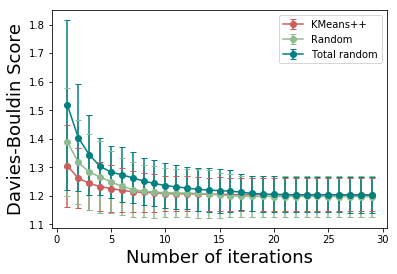

In [20]:
# for algorithm_name, mean, std in zip(names, means, stds):
#     plt.errorbar(xs, mean, std, label=algorithm_name, capsize=3, marker='o')

min_iter = min(plus_plus_max_iter, random_max_iter, total_random_max_iter)
# print( max_iter )

plus_plus_mean = plus_plus_mean[0:min_iter]
plus_plus_std = plus_plus_std[0:min_iter]

random_mean = random_mean[0:min_iter]
random_std = random_std[0:min_iter]

total_random_mean = total_random_mean[0:min_iter]
total_random_std = total_random_std[0:min_iter]

xs = list(range(1, min_iter + 1))
plt.errorbar(xs, plus_plus_mean, plus_plus_std, label='KMeans++', capsize=3, marker='o', color='indianred')
plt.errorbar(xs, random_mean, random_std, label='Random', capsize=3, marker='o', color='darkseagreen')
plt.errorbar(xs, total_random_mean, total_random_std, label='Total random', capsize=3, marker='o', color='teal')


plt.xlabel('Number of iterations', fontsize=18)
plt.ylabel('Davies-Bouldin Score', fontsize=18)
plt.legend()
plt.show()


In [21]:
def plot_k_means_for_various_k(X, k_min=3, k_max=25, n_iters=10):
    ks = list(range(k_min, k_max + 1))
    means, stds = [], []
    for k in ks:
        results = []
        for _ in range(n_iters):
            kmeans = KMeans(n_clusters = k, init='random')
            kmeans.fit(X)

            labels = kmeans.labels_
            score = sklearn.metrics.davies_bouldin_score(X, labels)
            results.append(score)

        means.append(np.mean(results))
        stds.append(np.std(results))

    plt.errorbar(ks, means, stds, label='k-means++', capsize=3, marker='o')

    plt.xlabel('K', fontsize=18)
    plt.ylabel('Davies-Bouldin Score', fontsize=18)
    plt.legend()
    plt.show()


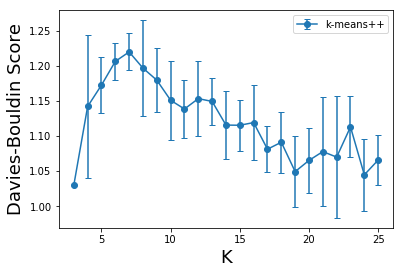

In [22]:
plot_k_means_for_various_k(X, k_min=3, k_max=25, n_iters=10)

Best k = 6

In [37]:
def plot_pca_2d(X, labels, k, centers=False):
    projected = PCA(2).fit_transform(X)
    c = list(range(k))

    cs = []
    for i in range(X.shape[0]):
        cs.append(c[labels[i]])

    if centers:
        plt.scatter(projected[:, 0], projected[:, 1], label=labels, marker='D', c=cs, s=60, cmap='rainbow')
    else:
        plt.scatter(projected[:, 0], projected[:, 1], label=labels, c=cs, cmap='rainbow')


def plot_k_means_clusters(df, k = 6, init='random'):
    X = df.values
    kmeans = KMeans(n_clusters=k, init=init)
    kmeans.fit(X)

    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    counter = collections.Counter(labels)
    df = pandas.DataFrame(centers, columns=df.columns)

    # todo characterize results
    print('Elements in clusters')
    for key, value in sorted(counter.items()):
        print(f'{key}: {value}')

#     print(tabulate(df.head(), headers='keys', tablefmt='psql'))

    plot_pca_2d(X, labels, k)
    plot_pca_2d(centers, np.array(range(k)), k, centers=True)
    plt.xlabel('Component X', fontsize=18)
    plt.ylabel('Component Y', fontsize=18)
    plt.title('By Clusters', fontsize=22)
    plt.show()


Elements in clusters
0: 47
1: 30
2: 7
3: 49
4: 60
5: 67


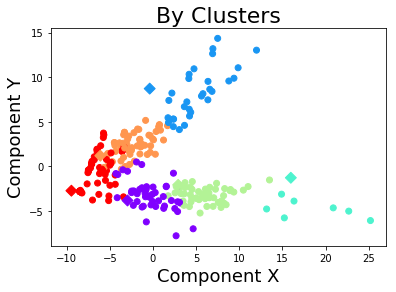

In [38]:
plot_k_means_clusters(df_normalized, k = 6, init='random')

In [39]:
def plot_categories(X, k, category_labels):
    plot_pca_2d(X, category_labels, k)
    plt.xlabel('Component X', fontsize=18)
    plt.ylabel('Component Y', fontsize=18)
    plt.title('By Categories', fontsize=22)
    plt.show()


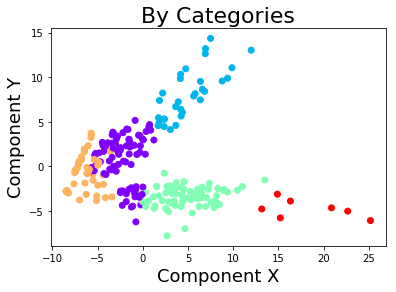

In [40]:
plot_categories(X, len(labels), labels)